<a href="https://colab.research.google.com/github/weedge/doraemon-nb/blob/main/deepspeed_MII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

legacy
- https://github.com/microsoft/DeepSpeed-MII/tree/main/mii/legacy
- https://towardsdatascience.com/deepspeed-deep-dive-model-implementations-for-inference-mii-b02aa5d5e7f7
- https://www.deepspeed.ai/2022/10/10/mii.html
- [**DeepSpeed Inference: Enabling Efficient Inference of Transformer Models at Unprecedented Scale**](https://arxiv.org/abs/2207.00032)

fastgen
- https://github.com/microsoft/DeepSpeed/blob/master/blogs/deepspeed-fastgen/README.md
- https://github.com/microsoft/DeepSpeed/blob/master/blogs/deepspeed-fastgen/chinese/README.md




In [93]:
#!pip install tensorrt
!ls /usr/local/lib/python3.10/dist-packages/tensorrt_libs/
#!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/lib/python3.10/dist-packages/tensorrt_libs/tensorrt_libs/

__init__.py			      libnvinfer_plugin.so.9  libnvonnxparser.so.9
libnvinfer_builder_resource.so.9.2.0  libnvinfer.so.9	      __pycache__


In [1]:
!pip install deepspeed-mii
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 34.2 MB/s eta 0:00:00
  Created wheel for deepspeed

In [2]:
!ds_report

[2023-12-16 04:19:37,809] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
--------------------------------------------------
DeepSpeed C++/CUDA extension op report
--------------------------------------------------
NOTE: Ops not installed will be just-in-time (JIT) compiled at
      runtime if needed. Op compatibility means that your system
      meet the required dependencies to JIT install the op.
--------------------------------------------------
JIT compiled ops requires ninja
ninja .................. [OKAY]
--------------------------------------------------
op name ................ installed .. compatible
--------------------------------------------------
 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  async_io: please install the libaio-dev package with apt
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables

In [3]:
!git clone https://github.com/microsoft/DeepSpeed-MII

Cloning into 'DeepSpeed-MII'...
remote: Enumerating objects: 3191, done.
remote: Counting objects: 100% (1789/1789), done.
remote: Compressing objects: 100% (674/674), done.
remote: Total 3191 (delta 1359), reused 1309 (delta 1089), pack-reused 1402
Receiving objects: 100% (3191/3191), 6.36 MiB | 22.08 MiB/s, done.
Resolving deltas: 100% (2063/2063), done.


# DeepSpeed-Legacy

ds mii 以前的组件

https://github.com/microsoft/DeepSpeed-MII/tree/main/mii/legacy





深度学习 (DL) 开源社区在过去几个月中出现了巨大的增长。极其强大的文本生成模型（如 Bloom 176B）或图像生成模型（如稳定扩散）现在可供通过 Hugging Face 等平台访问少量甚至单个 GPU 的任何人使用。尽管开源使人工智能功能的访问变得民主化，但其应用仍然受到两个关键因素的限制：推理延迟和成本。

深度学习模型推理的系统优化已经取得了重大进展，可以大大减少延迟和成本，但这些进展并不容易实现。这种可访问性有限的主要原因是深度学习模型推理环境多种多样，模型的大小、架构、系统性能特征、硬件要求等各不相同。确定适用于给定模型的适当系统优化集并正确应用它们是很重要的。通常超出了大多数数据科学家的能力范围，导致低延迟和低成本推理几乎无法实现。

DeepSpeed-MII 是 DeepSpeed 的一个新的开源 Python 库，旨在使强大模型的低延迟、低成本推理不仅可行，而且易于访问。

- MII 提供对数千种广泛使用的深度学习模型的高度优化实现。
- 与原始实施相比，MII 支持的模型可显着降低延迟和成本。例如，MII 将 Big-Science Bloom 176B 模型的延迟降低了 5.7 倍，同时将成本降低了 40 倍以上。同样，它将部署稳定扩散的延迟和成本降低了 1.9 倍。查看更多详细信息，[了解MII 的详尽延迟和成本分析](https://github.com/microsoft/DeepSpeed-MII/tree/main/mii/legacy#quantifying-latency-and-cost-reduction)。
- 为了实现低延迟/成本推理，MII 利用 DeepSpeed-Inference 的一系列优化，例如transformer的深度融合、用于多 GPU 推理的自动张量切片、使用 ZeroQuant 进行动态量化以及其他几个（请参阅我们的博客文章[了解更多详细信息](https://www.deepspeed.ai/2022/10/10/mii.html)）。
- 凭借最先进的性能，MII 只需几行代码即可通过 AML 在本地和 Azure 上低成本部署这些模型。


![](https://github.com/microsoft/DeepSpeed-MII/blob/main/mii/legacy/docs/images/mii-arch.png?raw=true)
MII 架构，显示 MII 如何使用 DS-Inference 自动优化 OSS 模型，然后使用 GRPC 在本地部署，或使用 AML Inference 在 Microsoft Azure 上部署。

MII 的底层由DeepSpeed-Inference提供支持。根据模型类型、模型大小、批量大小和可用硬件资源，MII 自动应用 DeepSpeed-Inference 中的一组适当的系统优化，以最小化延迟并最大化吞吐量。它通过使用许多预先指定的模型注入策略之一来实现这一点，该策略允许 MII 和 DeepSpeed-Inference 识别底层 PyTorch 模型架构并用优化的实现替换它（见图A）。在此过程中，MII 使其 DeepSpeed-Inference 中的广泛优化自动可用于其支持的数千种流行模型。


MII 可以使用 DeepSpeed-Inference 的两种变体。
- 第一个称为 ds-public，包含此处讨论的大部分 DeepSpeed-Inference 优化，也可以通过我们的开源 DeepSpeed 库获得。
- 第二个称为 ds-azure，提供与 Azure 更紧密的集成，并可通过 MII 向所有 Microsoft Azure 客户提供。我们将运行两个 DeepSpeed-Inference 变体的 MII 分别称为 MII-Public 和 MII-Azure。

虽然这两种变体都比开源 PyTorch 基线提供了显着的延迟和成本降低，但后者为基于生成的工作负载提供了额外的性能优势。此处提供了与 PyTorch 基线以及这两个版本之间的完整延迟和成本优势比较。

云服务部署方式大同小异，aws部署方式差不多

这里介绍第一种方式





## 部署

In [ ]:
#MII-Public 可以部署在本地或任何云产品上，只需几行代码。MII 创建一个轻量级 GRPC 服务器来支持这种形式的部署，并为查询提供 GRPC 推理端点。

# 作为示例，这里是Hugging Face 的bigscience/bloom-560m模型的部署：
import mii
mii_configs = {"tensor_parallel": 1, "dtype": "fp16"}
mii.deploy(task="text-generation",
           model="bigscience/bloom-560m",
           deployment_name="bloom560m_deployment",
           mii_config=mii_configs)


[2023-12-13 09:11:19,436] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2023-12-13 09:12:42,722] [INFO] [deployment.py:75:deploy] ************* MII is using DeepSpeed Optimizations to accelerate your model *************
[2023-12-13 09:12:42,722] [INFO] [deployment.py:75:deploy] ************* MII is using DeepSpeed Optimizations to accelerate your model *************
[2023-12-13 09:12:42,727] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter hf_auth_token is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
[2023-12-13 09:12:42,728] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter trust_remote_code is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
[2023-12-13 09:12:42,735] [INFO] [server.py:38:__init__] Hostfile /job/hostfile no

In [ ]:
!lsof -i:50051

COMMAND  PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python3 1480 root   40u  IPv4  62907      0t0  TCP *:50051 (LISTEN)


In [ ]:
!ps -ef | grep 1480

root        1480    1423 45 09:12 ?        00:01:21 /usr/bin/python3 -m mii.legacy.launch.multi_gpu_
root        2486     392  0 09:15 ?        00:00:00 /bin/bash -c ps -ef | grep 1480
root        2488    2486  0 09:15 ?        00:00:00 grep 1480


## 查询

In [ ]:
# 唯一需要的键是"query"，字典之外的所有其他项目都将作为generatekwargs 传递。对于 Hugging Face 提供的模型，您可以在其生成文档中找到所有可能的参数。
#import nest_asyncio
#nest_asyncio.apply()

import mii
generator = mii.mii_query_handle("bloom560m_deployment")
result = generator.query({"query": ["DeepSpeed is", "Seattle is"]}, do_sample=True, max_new_tokens=30)
print(result)


[2023-12-13 09:24:59,842] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter hf_auth_token is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
[2023-12-13 09:24:59,843] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter trust_remote_code is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
response: "DeepSpeed is [ ] "
response: "Seattle is The Crown:\n The...\n...\n...\n.........\n...\n...\n...\n...\n...\n...\n......\n...\n......\n...\n......\n...\n...\n...\n...\n......\n"
time_taken: 0.654122353
model_time_taken: -1



## 负载均衡

您可以启动负载平衡器和 MII 服务器的多个副本。当您指定 的值时replica_num，mii.deploy()启动负载均衡器服务器和replica_num副本数。请注意，每个副本均由部署在同一服务器上的tensor_parallel服务器进程组成。
```
mii_configs = {
...
    "tensor_parallel": tensor_parallel,
    "replica_num": replica_num,
    "hostfile": hostfile
}
mii.deploy(...
           mii_config=mii_configs,
           ...)
```

客户端将请求发送到负载均衡器，负载均衡器将请求转发到副本，而不是将请求发送到各个 MII 服务器。目前，负载均衡器实现了简单的循环算法。replica_num当设置为 1 时，负载均衡器充当简单代理。

hostfile是 DeepSpeed 启动器使用的主机文件的路径。当未指定 hostfile 时，DeepSpeed-MII 使用/job/hostfile为 DeepSpeed 定义的默认路径。有关详细信息，请参阅DeepSpeed 的文档。


https://www.deepspeed.ai/getting-started/#resource-configuration-multi-node

## 关闭服务

In [ ]:
import mii
mii.terminate("bloom560m_deployment")


[2023-12-13 09:25:31,531] [INFO] [terminate.py:12:terminate] Terminating server for bloom560m_deployment
[2023-12-13 09:25:31,531] [INFO] [terminate.py:12:terminate] Terminating server for bloom560m_deployment
[2023-12-13 09:25:31,535] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter hf_auth_token is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
[2023-12-13 09:25:31,536] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter trust_remote_code is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
[2023-12-13 09:25:31,550] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter hf_auth_token is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
[2023-12-13 09:25:31,551] [WARNING] [confi

## chat

https://github.com/microsoft/DeepSpeed-MII/blob/main/mii/legacy/examples/local/chat/README.md


**训练笔记：https://github.com/weedge/doraemon-nb/blob/main/ds_examples_chatbot.ipynb**


使用[DeepSpeed-Chat](https://github.com/microsoft/DeepSpeedExamples/blob/master/applications/DeepSpeed-Chat/README.md)通过RLHF训练的模型，已经上传至huggingface:

https://huggingface.co/AdamG012/chat-opt-1.3b-rlhf-actor-deepspeed

In [ ]:
# deploy start server
!cd DeepSpeed-MII/mii/legacy/examples/local/chat && (nohup python chat-server-example.py &)


nohup: appending output to 'nohup.out'


In [ ]:
!cat DeepSpeed-MII/mii/legacy/examples/local/chat/nohup.out

[2023-12-13 09:45:03,835] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2023-12-13 09:45:05.726142: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 09:45:05.726202: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 09:45:05.726229: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 09:45:06.874407: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Deploying AdamG012/chat-opt-1.3b-rlhf-actor-deepspeed...
[2023-12-13 09:45:44,816] [INFO] [deployment.py:75:deploy] **

In [ ]:
!lsof -i:50051

COMMAND   PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python3 10919 root   40u  IPv4 262091      0t0  TCP *:50051 (LISTEN)


In [ ]:
# cliet chat
!cd DeepSpeed-MII/mii/legacy/examples/local/chat && python chat-client-example.py


[2023-12-13 09:59:01,271] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2023-12-13 09:59:03.188707: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 09:59:03.188760: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 09:59:03.188785: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 09:59:04.323178: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[2023-12-13 09:59:05,180] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter hf_auth_token is d

In [ ]:
import mii
mii.terminate("chat_example_deployment")


[2023-12-13 10:01:33,497] [INFO] [terminate.py:12:terminate] Terminating server for chat_example_deployment
[2023-12-13 10:01:33,497] [INFO] [terminate.py:12:terminate] Terminating server for chat_example_deployment
[2023-12-13 10:01:33,501] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter hf_auth_token is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
[2023-12-13 10:01:33,502] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter trust_remote_code is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
[2023-12-13 10:01:33,540] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter hf_auth_token is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
[2023-12-13 10:01:33,541] [WARNING] 

In [ ]:
!lsof -i:50051

## more
更多示例：
https://github.com/microsoft/DeepSpeed-MII/tree/main/mii/legacy/examples/local

In [ ]:
!ls -lh DeepSpeed-MII/mii/legacy/examples/local

total 64K
drwxr-xr-x 2 root root 4.0K Dec 13 09:11 chat
-rw-r--r-- 1 root root  302 Dec 13 09:11 conversational-example.py
-rw-r--r-- 1 root root  757 Dec 13 09:11 conversational-query-example.py
-rw-r--r-- 1 root root  677 Dec 13 09:11 fill-mask-example.py
-rw-r--r-- 1 root root  351 Dec 13 09:11 question-answering-example.py
-rw-r--r-- 1 root root  386 Dec 13 09:11 question-answering-query-example.py
-rw-r--r-- 1 root root  317 Dec 13 09:11 text-classification-example.py
-rw-r--r-- 1 root root  410 Dec 13 09:11 text-classification-query-example.py
-rw-r--r-- 1 root root  324 Dec 13 09:11 text-generation-bloom560m-example.py
-rw-r--r-- 1 root root  456 Dec 13 09:11 text-generation-bloom-example.py
-rw-r--r-- 1 root root  721 Dec 13 09:11 text-generation-fbopt-example.py
-rw-r--r-- 1 root root  568 Dec 13 09:11 text-generation-query-example.py
-rw-r--r-- 1 root root 1.4K Dec 13 09:11 text-generation-zero-example.py
-rw-r--r-- 1 root root  288 Dec 13 09:11 token-classification-example.p

In [ ]:
!cd DeepSpeed-MII/mii/legacy/examples/local && (nohup python conversational-example.py &)


nohup: appending output to 'nohup.out'


In [ ]:
!cat DeepSpeed-MII/mii/legacy/examples/local/nohup.out

[2023-12-13 09:34:21,814] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2023-12-13 09:34:23.741561: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 09:34:23.741615: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 09:34:23.741646: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 09:34:24.887416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Deploying microsoft/DialoGPT-large...
[2023-12-13 09:35:02,358] [INFO] [deployment.py:75:deploy] ************* MII is 

In [ ]:
!cd DeepSpeed-MII/mii/legacy/examples/local && python conversational-query-example.py

[2023-12-13 09:41:57,043] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2023-12-13 09:41:58.932739: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 09:41:58.932786: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 09:41:58.932813: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 09:42:00.069422: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Querying microsoft/DialoGPT-large...
[2023-12-13 09:42:00,919] [WARNING] [config_utils.py:69:_process_deprecated_field

In [ ]:
!lsof -i:50051

COMMAND  PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python3 7710 root   23u  IPv4 190929      0t0  TCP localhost:45268->localhost:50051 (ESTABLISHED)
python3 7844 root   39u  IPv4 185094      0t0  TCP *:50051 (LISTEN)
python3 7844 root   40u  IPv4 189060      0t0  TCP localhost:50051->localhost:45268 (ESTABLISHED)


In [ ]:
import mii
mii.terminate("microsoft/DialoGPT-large_deployment")


[2023-12-13 09:43:59,850] [INFO] [terminate.py:12:terminate] Terminating server for microsoft/DialoGPT-large_deployment
[2023-12-13 09:43:59,850] [INFO] [terminate.py:12:terminate] Terminating server for microsoft/DialoGPT-large_deployment
[2023-12-13 09:43:59,854] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter hf_auth_token is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
[2023-12-13 09:43:59,855] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter trust_remote_code is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
[2023-12-13 09:43:59,861] [WARNING] [config_utils.py:69:_process_deprecated_field] Config parameter hf_auth_token is deprecated. Parameter will be removed. Please use the `pipeline_kwargs` field to pass kwargs to the HuggingFace pipeline creation.
[2023-12-13 

In [ ]:
!lsof -i:50051

# DeepSpeed-FastGen

https://github.com/microsoft/DeepSpeed/blob/master/blogs/deepspeed-fastgen/chinese/README.md

ds-mii-fastgen 是为了解决LLMs推理加速，提高推理吞吐，以及长prompt问题(llm已经支持长token,树万token)。

GPT-4 和 LLaMA 这样的大型语言模型（LLMs）已在各个层次上成为了集成 AI 的主流服务应用。从常规聊天模型到文档摘要，从自动驾驶到各个软件中的Copilot功能，这些模型的部署和服务需求正在迅速增加。像 DeepSpeed、PyTorch 和其他几个框架可以在 LLM 训练期间实现良好的硬件利用率。但它们在与用户互动及处理开放式文本生成等任务时，受限于这些操作的计算密集度相对较低，现有系统往往在推理吞吐量上遇到瓶颈。

为了解决这一问题， vLLM 这样由 PagedAttention 驱动的框架和 [Orca](https://www.usenix.org/system/files/osdi22-yu.pdf) 这样的系统显著提高了 LLM 推理的性能。然而，这些系统在面对长提示的工作负载时，依旧难以提供良好的服务质量。随着越来越多的模型（例如 MPT-StoryWriter）和系统（例如DeepSpeed Ulysses）支持延伸到数万个令牌的上下文窗口，这些长提示工作负载变得越来越重要。为了更好地理解问题，我们在下文中提供了详细的示例来说明 LLM 的文本生成是如何在“提示处理”和“生成”的这两个阶段中工作的。当系统将它们视为不同的阶段时，生成阶段将被提示处理所抢占，这可能会破坏服务级别协议（SLAs）。

tips:
- vllm 跟进 https://github.com/vllm-project/vllm/issues/1562

DeepSpeed-FastGen 框架，它通过采用动态 SplitFuse 技术，能够提供比vLLM 等先进系统高出多达 2.3 倍的有效吞吐量。DeepSpeed-FastGen 是 DeepSpeed-MII 和 DeepSpeed-Inference 的结合，提供了一个易于使用的服务系统



DeepSpeed-FastGen 是 [DeepSpeed-MII](https://github.com/microsoft/DeepSpeed-MII) 和 [DeepSpeed-Inference](https://github.com/microsoft/DeepSpeed) 的协同组合，如下图所示。这两个软件包共同提供了系统的各个组成部分，包括前端 API、用于使用动态 SplitFuse 调度批次的主机和设备基础设施、优化的内核实现，以及构建新模型实现的工具。
![](https://github.com/microsoft/DeepSpeed/blob/master/blogs/deepspeed-fastgen/assets/images/fastgen-arch-light.png?raw=true)


## 现有 LLM 服务技术

单个序列的文本生成工作负载包含两个阶段：1）提示处理，此阶段系统处理用户输入的文本，将其转换成一系列令牌并构建用于注意力机制的键值（KV）缓存；2）生成令牌，即向缓存中添加单个令牌并产生新的令牌。在生成文本序列的过程中，系统将对模型进行多次前向调用以生成完整的文本序列。现有文献和系统中已经提出了两种主要技术，它们解决了这些阶段中可能出现的各种限制和瓶颈。

分块 KV 缓存：

vLLM识别出大型单体KV缓存导致的内存碎片化显著降低了大型语言模型服务系统的并发性，并提出了“分页注意力”Paged Attention 机制来实现非连续KV缓存，并增加整个系统的总吞吐量。此技术采用分页缓存机制，从而提升了系统的整体吞吐量。不同于之前分配各个不同大小的连续内存块的做法，分块 KV 缓存中的底层存储是固定大小的块（也称为页面）。分块 KV 缓存通过消除 KV 缓存引起的内存碎片化，增加了潜在的序列并发量，从而增加了系统吞吐量。非连续 KV 缓存也被 HuggingFace TGI 和 NVIDIA TensorRT-LLM 等框架所实现。

连续批处理：

过去，动态批处理（服务器等待多个请求以同步处理）被用来提高 GPU 利用率。然而，这种方法有缺点，因为它通常需要将输入填充到相同长度或使系统等待以构建更大的批次（batch）。

近期大型语言模型（LLM）推理和服务的优化一直专注于细粒度调度和优化内存效率。例如，Orca 提出了 迭代级调度（也称为连续批处理），它在模型的每次前向传递时作出独特的调度决策。这允许请求根据需要加入/离开批次，从而消除了填充请求的需要，提高了总体吞吐量。除了 Orca，NVIDIA TRT-LLM、HuggingFace TGI 和 vLLM 也实现了连续批处理。

在当前系统中，有两种主要方法来实现连续批处理。在 TGI 和 vLLM 中，生成阶段被抢占以执行提示处理（在 TGI 中称为填充）然后继续生成。在 Orca 中，这些阶段不被区分；相反，只要总序列数没有达到固定限制，Orca 就会将提示加入正在运行的批次中。这两种方法都在不同程度上需要暂停生成以处理长提示

为了解决这些缺点，我们提出了一种新颖的提示和生成组合策略，动态 SplitFuse。



## 动态 SplitFuse：一种新颖的提示和生成组合策略

类似于现有的框架如 TRT-LLM、TGI 和 vLLM，DeepSpeed-FastGen 的目标是利用连续批处理和非连续 KV 缓存技术，以提升数据中心服务大型语言模型（LLM）的硬件利用率和响应速度。为了实现更高的性能，DeepSpeed-FastGen 提出了 SplitFuse 技术，它利用动态提示和生成分解, 统一来进一步改善连续批处理和系统吞吐量。


### 动态分割融合（Dynamic SplitFuse）
动态分割融合是一种用于提示处理和令牌生成的新型令牌组成策略。DeepSpeed-FastGen 利用动态分割融合策略，通过从提示中取出部分令牌并与生成过程相结合，使得模型可以保持一致的前向传递大小（forward size）。具体来说，动态分割融合执行两个关键行为：

1. 将长提示分解成更小的块，并在多个前向传递（迭代）中进行调度，只有在最后一个传递中才执行生成。
2. 短提示将被组合以精确填满目标令牌预算。即使是短提示也可能被分解，以确保预算被精确满足，前向大小（forward sizes）保持良好对齐。

动态分割融合（Dynamic SplitFuse）提升了以下性能指标：

1. 更好的响应性： 由于长提示不再需要极长的前向传递来处理，模型将提供更低的客户端延迟。在同一时间窗口内执行的前向传递更多。
2. 更高的效率： 短提示的融合到更大的令牌预算使模型能够持续运行在高吞吐量状态。
3. 更低的波动和更好的一致性： 由于前向传递的大小一致，且前向传递大小是性能的主要决定因素，每个前向传递的延迟比其他系统更加一致。生成频率也是如此，因为DeepSpeed-FastGen不需要像其他先前的系统那样抢占或长时间运行提示，因此延迟会更低。
因此，与现有最先进的服务系统相比，DeepSpeed-FastGen 将以允许快速、持续生成的速率消耗来自提示的令牌，同时向系统添加令牌，提高系统利用率，提供更低的延迟和更高的吞吐量流式生成给所有客户端。



##  性能评估

DeepSpeed-FastGen 利用分块 KV 缓存和动态分割融合连续批处理，提供了最先进的 LLM 服务性能。我们以下述的基准测试方法对 DeepSpeed-FastGen 和 vLLM 在一系列模型和硬件配置上进行评估。

我们采用两种主要的定量方法来衡量性能。

吞吐量-延迟曲线： 生产环境的两个关键指标是吞吐量（以每秒请求计）和延迟（每个请求的响应性）。为了衡量这一点，我们模拟了多个客户端（数量从 1 到 32 不等）同时向服务器发送请求（总计 512 个）的情况。每个请求的结果延迟在端点测量，吞吐量通过完成实验的端到端时间来测量。

有效吞吐量（用户体验SLA）： 诸如聊天应用程序之类的交互式应用程序可能有比上述指标（如端到端延迟）更严格和复杂的要求。以越来越受欢迎的聊天应用为例：

用户通过发送提示（输入）来开始对话。
系统处理提示并返回第一个令牌。
随着生成的进行，后续令牌被流式传输给用户。
在这个过程的每个阶段，系统都有可能提供不利的用户体验；例如，第一个令牌到达得太慢；或生成似乎停止了一段时间。我们提出了一个考虑这两个维度的 SLA 框架。

由于提示和生成文本的长度差异很大，影响计算成本，因此设定同一个 SLA 值对于吞吐量和延迟是不切实际的。因此，我们将提示延迟的 SLA 定义为 “|提示中的令牌|/512” 秒（= 512 令牌/秒）。此外，考虑到人类的阅读速度，我们将生成延迟的 SLA 设置在指数移动平均（EMA）上为 2、4 或 6 令牌/秒。能够达到这些 SLA 的请求被认为是成功的，这些成功请求的吞吐量被称为有效吞吐量。

我们通过在 NVIDIA A100、H100 和 A6000 上运行 Llama-2 7B、Llama-2 13B 和 Llama-2 70B 对 vLLM 和 DeepSpeed-FastGen进行了评估。

DeepSpeed-FastGen 提供了副本级负载均衡，可以将请求均匀分布在多个服务器上，轻松扩展应用程序。

Tips:

在评估使用推理服务成本的时候，需要结合当前用户请求峰值进行评估，结合A100-40/80G卡作为基础卡来部署，需要评估整体算力成本； gpu利用率上去了，性能可以水平扩展，吞吐线性增长就更好了。



# 部署选项
示例均可在 DeepSpeedExamples 中运行。安装后，有两种部署方式：交互式非持久管道或持久化服务部署：

## 非持久管道
非持久管道部署是快速入门的好方法，只需几行代码即可完成。非持久模型只在您运行的 python 脚本期间存在，适用于临时交互式会话。



In [4]:
# https://github.com/microsoft/DeepSpeed-MII/issues/273 need SM>=8.0 (Ampere+) A100
# if use T4 GPU , need use https://github.com/microsoft/DeepSpeed-MII/tree/main/mii/legacy
from mii import pipeline
pipe = pipeline("mistralai/Mistral-7B-v0.1")
output = pipe(["Hello, my name is", "DeepSpeed is"], max_new_tokens=128)
print(output)


[2023-12-16 04:20:35,306] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2023-12-16 04:20:40,245] [INFO] [comm.py:637:init_distributed] cdb=None
[2023-12-16 04:20:40,246] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

[2023-12-16 04:21:28,463] [INFO] [engine_v2.py:82:__init__] Building model...


Using /root/.cache/torch_extensions/py310_cu121 as PyTorch extensions root...
Creating extension directory /root/.cache/torch_extensions/py310_cu121/inference_core_ops...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py310_cu121/inference_core_ops/build.ninja...
Building extension module inference_core_ops...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module inference_core_ops...
Using /root/.cache/torch_extensions/py310_cu121 as PyTorch extensions root...
Creating extension directory /root/.cache/torch_extensions/py310_cu121/ragged_device_ops...


Time to load inference_core_ops op: 37.377023458480835 seconds


Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py310_cu121/ragged_device_ops/build.ninja...
Building extension module ragged_device_ops...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


Time to load ragged_device_ops op: 51.90882420539856 seconds


Loading extension module ragged_device_ops...
Using /root/.cache/torch_extensions/py310_cu121 as PyTorch extensions root...
Creating extension directory /root/.cache/torch_extensions/py310_cu121/ragged_ops...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py310_cu121/ragged_ops/build.ninja...
Building extension module ragged_ops...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


Time to load ragged_ops op: 32.21213245391846 seconds
[2023-12-16 04:23:30,759] [INFO] [huggingface_engine.py:112:parameters] Loading checkpoint: /root/.cache/huggingface/hub/models--mistralai--Mistral-7B-v0.1/snapshots/26bca36bde8333b5d7f72e9ed20ccda6a618af24/model-00002-of-00002.safetensors


Loading extension module ragged_ops...


[2023-12-16 04:23:31,258] [INFO] [huggingface_engine.py:112:parameters] Loading checkpoint: /root/.cache/huggingface/hub/models--mistralai--Mistral-7B-v0.1/snapshots/26bca36bde8333b5d7f72e9ed20ccda6a618af24/model-00001-of-00002.safetensors
[2023-12-16 04:23:36,569] [INFO] [engine_v2.py:84:__init__] Model built.
[2023-12-16 04:23:36,594] [INFO] [kv_cache.py:135:__init__] Allocating KV-cache 0 with shape: (32, 3134, 64, 2, 8, 128) consisting of 3134 blocks.


tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

[Yana,

It’s been a long time since I posted here and I thought it was time I updated you on my life. My family and I are living in Vienna, Austria and we love it. We have a terrace, a garden and a wonderful view on the landscape from our apartment.

I joined a hiking group, which goes on long and short walks. I enjoy both very much. Here I am on a hike to Vienna, Austria. I am enjoying the camaraderie of the group, which has 20 – 25 people in it.

Here is a, an open source ML framework that simplifies distributed model training with GPUs and CPUs. This high performance library allows developers to train larger models with limited hardware resources.

DeepSpeed now adds two new features to expand the capability of this framework:

- Checkpointing can reduce the length of training runs by reusing training jobs across GPUs.
- Optimizing data transfer allows you to compress data and transfer it between machines using standard filesystems, which reduces the amount of memory used and elimin

## 持久部署
持久部署非常适合用于长时间运行和生产的应用。持久部署使用了轻量级的 GRPC 服务器，可以使用以下两行代码创建：



In [14]:
import mii
#mii.serve("mistralai/Mistral-7B-Instruct-v0.2")

mii.serve("mistralai/Mistral-7B-v0.1")


[2023-12-16 04:44:01,915] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2023-12-16 04:44:06,594] [INFO] [server.py:38:__init__] Hostfile /job/hostfile not found, creating hostfile.
[2023-12-16 04:44:06,594] [INFO] [server.py:38:__init__] Hostfile /job/hostfile not found, creating hostfile.
[2023-12-16 04:44:06,603] [INFO] [server.py:107:_launch_server_process] msg_server launch: ['deepspeed', '-i', 'localhost:0', '--master_port', '29500', '--master_addr', 'localhost', '--no_ssh_check', '--no_local_rank', '--no_python', '/usr/bin/python3', '-m', 'mii.launch.multi_gpu_server', '--deployment-name', 'mistralai/Mistral-7B-v0.1-mii-deployment', '--load-balancer-port', '50050', '--restful-gateway-port', '51080', '--restful-gateway-procs', '32', '--server-port', '50051', '--zmq-port', '25555', '--model-config', 'eyJtb2RlbF9uYW1lX29yX3BhdGgiOiAibWlzdHJhbGFpL01pc3RyYWwtN0ItdjAuMSIsICJ0b2tlbml6ZXIiOiAibWlzdHJhbGFpL01pc3RyYWwtN0ItdjAuMSIsICJ0YXNrIjo

In [16]:
!lsof -i:29500
!lsof -i:50050
!lsof -i:51080

COMMAND  PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python3 8608 root   15u  IPv6 193369      0t0  TCP *:29500 (LISTEN)
python3 8608 root   18u  IPv6 193371      0t0  TCP localhost:33198->localhost:29500 (ESTABLISHED)
python3 8608 root   19u  IPv6 188293      0t0  TCP localhost:29500->localhost:33198 (ESTABLISHED)
COMMAND  PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python3 8440 root   22u  IPv4 190022      0t0  TCP *:50050 (LISTEN)


In [18]:
!ps -ef | grep python3

root          68       7  0 04:16 ?        00:00:07 [python3] <defunct>
root          69       7  0 04:16 ?        00:00:00 python3 /usr/local/bin/colab-fileshim.py
root         125       7  0 04:16 ?        00:00:06 /usr/bin/python3 /usr/local/bin/jupyter-notebook
root        7473     125  4 04:40 ?        00:00:12 /usr/bin/python3 -m colab_kernel_launcher -f /ro
root        7511       1  0 04:40 ?        00:00:00 /usr/bin/python3 /usr/local/lib/python3.10/dist-
root        8439    7473  9 04:44 ?        00:00:06 /usr/bin/python3 /usr/local/bin/deepspeed -i loc
root        8440    7473 13 04:44 ?        00:00:09 /usr/bin/python3 -m mii.launch.multi_gpu_server 
root        8531    8439 10 04:44 ?        00:00:06 /usr/bin/python3 -u -m deepspeed.launcher.launch
root        8608    8531 99 04:44 ?        00:01:07 /usr/bin/python3 -m mii.launch.multi_gpu_server 
root        8992    7473  0 04:45 ?        00:00:00 /bin/bash -c ps -ef | grep python3
root        8994    8992  0 04:45 ?      

In [22]:
# 上述服务器可以同时被多个客户端查询，这要归功于 DeepSpeed-MII 内置的负载平衡器。创建客户端也只需要两行代码：
import nest_asyncio
nest_asyncio.apply()

#client = mii.client("mistralai/Mistral-7B-Instruct-v0.2")
client = mii.client("mistralai/Mistral-7B-v0.1")
output = client.generate("Deepspeed is", max_new_tokens=128)
print(output)


[an open-source, Nvidia-backed machine learning tool designed to make training deep learning models faster and more efficient. Deepspeed specializes in scaling deep learning models across different machines and GPU types. Deepspeed’s popularity has recently surged as Nvidia continues to push deep learning applications at scale.

With the tool, engineers can train and scale models more efficiently, cutting down their training time and speeding up their model execution.

Nvidia’s Deepspeed uses popular open source frameworks, including PyTorch, MPI, and Apex, to implement horizontal scaling]


In [23]:
import nest_asyncio
nest_asyncio.apply()

# 使用 mistralai-7b mistral-tiny模型， 对中文支持不够，详情见 https://docs.mistral.ai/models/
#
#client = mii.client("mistralai/Mistral-7B-Instruct-v0.2")
client = mii.client("mistralai/Mistral-7B-v0.1")
output = client.generate("深度学习是", max_new_tokens=128)
print(output)


[什么？

1.作为一个主题，深度学习又被广泛地应用于计算机视觉、自然语言处理、人工智能、机器学习、凡是需要解决复杂问题的领域。

2.深度学习依赖人工智能的基础学习。

3.深度学习算法所使用的模型可以把复杂任务分解为一系列的任务，每个任务可以由不同]


In [26]:
#持久部署可以在不再需要时终止：

client.terminate_server()


In [40]:
!lsof -i:29500
!lsof -i:50050
!lsof -i:51080

In [37]:
!ps -ef | grep benchmark

root       80726    7473  0 09:22 ?        00:00:00 /bin/bash -c ps -ef | grep benchmark
root       80728   80726  0 09:22 ?        00:00:00 grep benchmark


In [36]:
!ps -ef | grep run_benchmark | awk '{print $2}' | xargs kill

kill: (80706): No such process
^C


# MII-example

In [6]:
!git clone https://github.com/microsoft/DeepSpeedExamples.git

Cloning into 'DeepSpeedExamples'...
remote: Enumerating objects: 9729, done.
remote: Total 9729 (delta 0), reused 0 (delta 0), pack-reused 9729
Receiving objects: 100% (9729/9729), 119.27 MiB | 16.49 MiB/s, done.
Resolving deltas: 100% (5442/5442), done.


## benchmark-FasteGen

In [12]:
import locale
print(locale.getpreferredencoding())


UTF-8


In [11]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding


In [42]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credent

In [29]:
!cd DeepSpeedExamples/benchmarks/inference/mii \
  && python server.py -h

[2023-12-16 04:57:19,334] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2023-12-16 04:57:21.470522: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 04:57:21.470583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 04:57:21.472252: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 04:57:22.703255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: server.py [-h] [--model_name MODEL_NAME] [-d DEPLOYMENT_NAME] [-t TASK]
                 [-m TENSOR_PARALLEL] [-b 

In [1]:
!cd DeepSpeedExamples/benchmarks/inference/mii \
  && python server.py --model_name meta-llama/Llama-2-7b-hf -d llama2-7b-tp1-b768 -m 1 -b 768 start

[2023-12-16 12:19:03,415] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2023-12-16 12:19:05.592081: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 12:19:05.592139: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 12:19:05.593966: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 12:19:06.842722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[2023-12-16 12:19:08,002] [INFO] [server.py:38:__init__] Hostfile /job/hostfile not found, creating hostfile.
[2023-12-16

In [ ]:
!cd DeepSpeedExamples/benchmarks/inference/mii && python server.py -d llama2-7b-tp1-b768 stop

In [3]:
!lsof -i:50051


In [4]:
#Deployment: llama2-7b-tp1-b768 Clients: 1, Prompt (mean): 2600 tokens, Generation (mean): 60 tokens, Query throughput: 0.791 queries/s, Token throughput (total): 2225.653 tokens/s, Query latency: 1.265 s, Token generation latency: 0.018 s/token, First token received: 0.204 s
#Namespace(max_new_tokens=60, deployment_name='llama2-7b-tp1-b768', num_queries=512, warmup=1, client_num=2, prompt_length=2600, use_thread=False, stream=True, vllm=False, out_json_path=PosixPath('logs.llama2-7b-tp1-b768/llama2-7b-tp1-b768_c2_p2600_g60.json'))

!cd DeepSpeedExamples/benchmarks/inference/mii \
  && bash -x run_example.sh

流式输出内容被截断，只能显示最后 5000 行内容。
queue size: 354 (140712)
queue size: 353 (140708)
queue size: 352 (140713)
queue size: 351 (140711)
queue size: 350 (140710)
queue size: 349 (140709)
queue size: 348 (140712)
queue size: 347 (140713)
queue size: 346 (140708)
queue size: 345 (140710)
queue size: 344 (140709)
queue size: 343 (140711)
queue size: 342 (140712)
queue size: 341 (140713)
queue size: 340 (140709)
queue size: 339 (140708)
queue size: 338 (140710)
queue size: 337 (140711)
queue size: 336 (140712)
queue size: 335 (140708)
queue size: 334 (140713)
queue size: 333 (140709)
queue size: 332 (140711)
queue size: 331 (140712)
queue size: 330 (140713)
queue size: 329 (140709)
queue size: 328 (140710)
queue size: 327 (140708)
queue size: 326 (140711)
queue size: 325 (140710)
queue size: 324 (140713)
queue size: 323 (140712)
queue size: 322 (140713)
queue size: 321 (140709)
queue size: 320 (140711)
queue size: 319 (140710)
queue size: 318 (140708)
queue size: 317 (140712)
queue size: 316 (140713

In [5]:
!cd DeepSpeedExamples/benchmarks/inference/mii && ls -gh logs.llama2-7b-tp1-b768/

total 87M
-rw-r--r-- 1 root  25K Dec 16 13:16 bench_client_num_c12_p2600_g60.log
-rw-r--r-- 1 root  29K Dec 16 13:20 bench_client_num_c16_p2600_g60.log
-rw-r--r-- 1 root  14K Dec 16 12:55 bench_client_num_c1_p2600_g60.log
-rw-r--r-- 1 root  33K Dec 16 13:23 bench_client_num_c20_p2600_g60.log
-rw-r--r-- 1 root  37K Dec 16 13:26 bench_client_num_c24_p2600_g60.log
-rw-r--r-- 1 root  40K Dec 16 13:30 bench_client_num_c28_p2600_g60.log
-rw-r--r-- 1 root  15K Dec 16 13:01 bench_client_num_c2_p2600_g60.log
-rw-r--r-- 1 root  44K Dec 16 13:33 bench_client_num_c32_p2600_g60.log
-rw-r--r-- 1 root  17K Dec 16 13:06 bench_client_num_c4_p2600_g60.log
-rw-r--r-- 1 root  19K Dec 16 13:10 bench_client_num_c6_p2600_g60.log
-rw-r--r-- 1 root  21K Dec 16 13:13 bench_client_num_c8_p2600_g60.log
-rw-r--r-- 1 root 7.8M Dec 16 13:16 llama2-7b-tp1-b768_c12_p2600_g60.json
-rw-r--r-- 1 root 7.8M Dec 16 13:20 llama2-7b-tp1-b768_c16_p2600_g60.json
-rw-r--r-- 1 root 7.9M Dec 16 12:55 llama2-7b-tp1-b768_c1_p2600_g6

In [25]:
!cd DeepSpeedExamples/benchmarks/inference/mii && ls -gh charts/goodtput/

total 480K
-rw-r--r-- 1 root 38K Dec 16 13:37 goodput_llama7b_SLAp512g1_tp1_b768_p2600g60_cum.png
-rw-r--r-- 1 root 38K Dec 16 13:38 goodput_llama7b_SLAp512g1_tp1_b768_p2600g60_ema16.png
-rw-r--r-- 1 root 38K Dec 16 13:39 goodput_llama7b_SLAp512g2_tp1_b768_p2600g60_cum.png
-rw-r--r-- 1 root 38K Dec 16 13:40 goodput_llama7b_SLAp512g2_tp1_b768_p2600g60_ema16.png
-rw-r--r-- 1 root 38K Dec 16 13:40 goodput_llama7b_SLAp512g3_tp1_b768_p2600g60_cum.png
-rw-r--r-- 1 root 38K Dec 16 13:41 goodput_llama7b_SLAp512g3_tp1_b768_p2600g60_ema16.png
-rw-r--r-- 1 root 38K Dec 16 13:42 goodput_llama7b_SLAp512g4_tp1_b768_p2600g60_cum.png
-rw-r--r-- 1 root 38K Dec 16 13:43 goodput_llama7b_SLAp512g4_tp1_b768_p2600g60_ema16.png
-rw-r--r-- 1 root 38K Dec 16 13:44 goodput_llama7b_SLAp512g6_tp1_b768_p2600g60_cum.png
-rw-r--r-- 1 root 38K Dec 16 13:45 goodput_llama7b_SLAp512g6_tp1_b768_p2600g60_ema16.png
-rw-r--r-- 1 root 38K Dec 16 13:46 goodput_llama7b_SLAp512g8_tp1_b768_p2600g60_cum.png
-rw-r--r-- 1 root 38K 

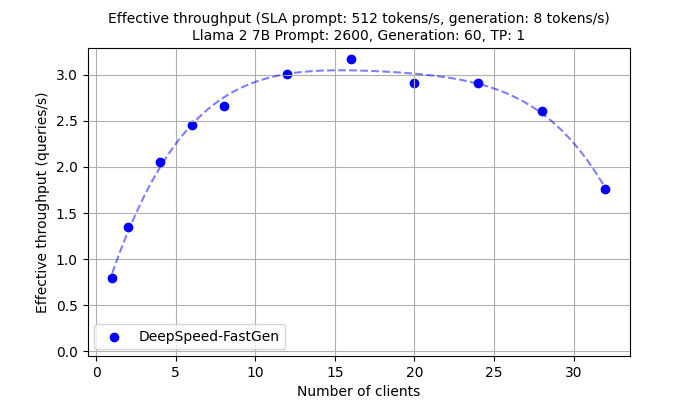

In [28]:
import PIL.Image

img = PIL.Image.open('/content/DeepSpeedExamples/benchmarks/inference/mii/charts/goodtput/goodput_llama7b_SLAp512g8_tp1_b768_p2600g60_cum.png')
img


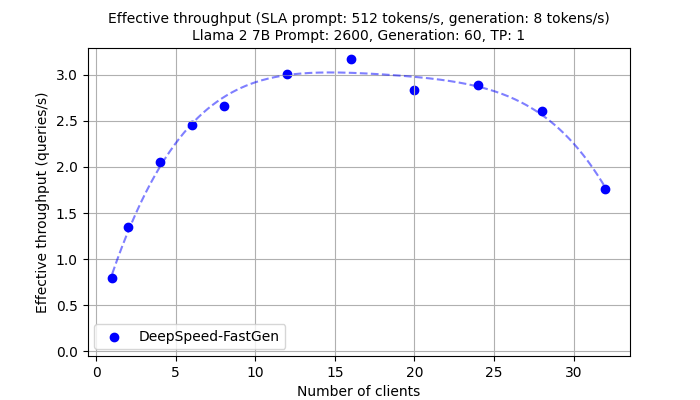

In [29]:
import PIL.Image

img = PIL.Image.open('/content/DeepSpeedExamples/benchmarks/inference/mii/charts/goodtput/goodput_llama7b_SLAp512g8_tp1_b768_p2600g60_ema16.png')
img



In [7]:
!cd DeepSpeedExamples/benchmarks/inference/mii && ls -gh charts/throughput_latency/

total 32K
-rw-r--r-- 1 root 29K Dec 16 13:36 th_lat_curve_llama7b_tp1_p2600g60.png


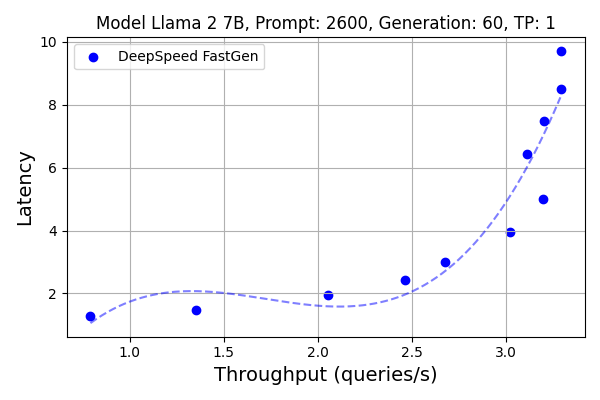

In [24]:
import PIL.Image

img = PIL.Image.open('/content/DeepSpeedExamples/benchmarks/inference/mii/charts/throughput_latency/th_lat_curve_llama7b_tp1_p2600g60.png')
img




```
nvidia-smi --query-gpu=timestamp,memory.total,memory.free,memory.used,name,utilization.gpu,utilization.memory --format=csv -l 2
timestamp, memory.total [MiB], memory.free [MiB], memory.used [MiB], name, utilization.gpu [%], utilization.memory [%]
2023/12/16 12:45:16.063, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 85 %, 65 %
2023/12/16 12:45:18.064, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 82 %, 67 %
2023/12/16 12:45:20.065, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 83 %, 49 %
2023/12/16 12:45:22.066, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 84 %, 66 %
2023/12/16 12:45:24.067, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 81 %, 60 %
2023/12/16 12:45:26.068, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 80 %, 63 %
2023/12/16 12:45:28.070, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 85 %, 65 %
2023/12/16 12:45:30.071, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 85 %, 64 %
2023/12/16 12:45:32.071, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 88 %, 60 %
2023/12/16 12:45:34.073, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 86 %, 69 %
2023/12/16 12:45:36.074, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 85 %, 64 %
2023/12/16 12:45:38.075, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 88 %, 68 %
2023/12/16 12:45:40.076, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 88 %, 66 %
2023/12/16 12:45:42.076, 40960 MiB, 944 MiB, 39569 MiB, NVIDIA A100-SXM4-40GB, 87 %, 63 %
```

In [ ]:
!cd DeepSpeedExamples/benchmarks/inference/mii \
  && python server.py --model_name  mistralai/Mistral-7B-Instruct-v0.2 -d Mistral-7B-Instruct-tp1-b768 -m 1 -b 768 start

In [ ]:
!cd DeepSpeedExamples/benchmarks/inference/mii && python server.py -d Mistral-7B-Instruct-tp1-b768 stop

# Mixtral

- https://docs.mistral.ai/models/

- https://mistral.ai/news/la-plateforme/

- https://mistral.ai/news/mixtral-of-experts/ （MoE）

In [3]:
#cpu

from transformers import AutoModelForCausalLM, AutoTokenizer

#model_id = "mistralai/Mixtral-8x7B-v0.1"
model_id = "mistralai/Mistral-7B-Instruct-v0.2"
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(model_id)

text = "Hello my name is"
inputs = tokenizer(text, return_tensors="pt")

outputs = model.generate(**inputs, max_new_tokens=20)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Hello my name is Kieran and I am a 21 year old student from the UK. I am currently studying for a degree in Computer Science and I have a strong passion for technology and programming. I have been using Linux for around 5 years now and I have a good understanding of the Linux operating system. I have experience with various distributions such as Ubuntu, Debian, Fedora, and Arch Linux. I am also familiar with various programming languages such as Python, Java, C++, and HTML/CSS. I am always looking to learn new things and expand my knowledge in technology and programming. I am also an avid gamer and I enjoy playing games on my Linux system. I hope to use this blog to share my experiences and knowledge with others and to learn from others as well. If you have any questions or comments, please feel free to leave them below. Thank you for visiting my blog!


In [4]:
#gpu


from transformers import AutoModelForCausalLM, AutoTokenizer

device = "cuda" # the device to load the model onto

model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")

# chat
messages = [
    {"role": "user", "content": "What is your favourite condiment?"},
    {"role": "assistant", "content": "Well, I'm quite partial to a good squeeze of fresh lemon juice. It adds just the right amount of zesty flavour to whatever I'm cooking up in the kitchen!"},
    {"role": "user", "content": "Do you have mayonnaise recipes?"}
]

encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt")

model_inputs = encodeds.to(device)
model.to(device)

generated_ids = model.generate(model_inputs, max_new_tokens=1000, do_sample=True)
decoded = tokenizer.batch_decode(generated_ids)
print(decoded[0])


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> [INST] What is your favourite condiment? [/INST]Well, I'm quite partial to a good squeeze of fresh lemon juice. It adds just the right amount of zesty flavour to whatever I'm cooking up in the kitchen!</s> [INST] Do you have mayonnaise recipes? [/INST] Yes, I can share a simple and classic homemade mayonnaise recipe with you. Here's what you'll need:

Ingredients:
- 1 egg yolk
- 1 tablespoon Dijon mustard
- 1 cup (200 ml) vegetable oil
- 1 tablespoon white wine vinegar
- 1 tablespoon water
- Salt to taste

Instructions:
1. In a medium bowl, whisk together the egg yolk and Dijon mustard until they are well combined.
2. Start adding the oil very slowly, drop by drop, while constantly whisking the mixture. This is an important step to prevent the oil from separating from the yolk and creating an oily mess. Once the oil has been fully incorporated, you can start adding it in a thin stream.
3. When about half of the oil has been added, you can start adding the white wine vinegar and wat

In [ ]:
!sleep 7200

#TensorRT

In [96]:
# https://developer.nvidia.com/tensorrt
%%bash
os="ubuntu2204"
#tag="9.2.0-cuda-12.2"
tag="8.6.1-cuda-12.2"
sudo dpkg -i nv-tensorrt-local-repo-${os}-${tag}_1.0-1_amd64.deb
sudo cp /var/nv-tensorrt-local-repo-${os}-${tag}/*-keyring.gpg /usr/share/keyrings/
sudo apt-get update

# if no, need install the last tensorrt version

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...


dpkg: error: cannot access archive 'nv-tensorrt-local-repo-ubuntu2204-8.6.1-cuda-12.2_1.0-1_amd64.deb': No such file or directory
cp: cannot stat '/var/nv-tensorrt-local-repo-ubuntu2204-8.6.1-cuda-12.2/*-keyring.gpg': No such file or directory


In [99]:
!git clone https://github.com/NVIDIA/TensorRT.git

Cloning into 'TensorRT'...
remote: Enumerating objects: 17205, done.
remote: Counting objects: 100% (2236/2236), done.
remote: Compressing objects: 100% (507/507), done.
remote: Total 17205 (delta 1796), reused 1869 (delta 1720), pack-reused 14969
Receiving objects: 100% (17205/17205), 101.66 MiB | 15.75 MiB/s, done.
Resolving deltas: 100% (12185/12185), done.


In [100]:
!cd TensorRT && git checkout v9.2.0

Note: switching to 'v9.2.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at a1820ecd Fix some typos in Readme.md


In [101]:
!cd TensorRT && git submodule update --init --recursive


Submodule 'parsers/onnx' (https://github.com/onnx/onnx-tensorrt.git) registered for path 'parsers/onnx'
Submodule 'third_party/cub' (https://github.com/NVlabs/cub.git) registered for path 'third_party/cub'
Submodule 'third_party/protobuf' (https://github.com/protocolbuffers/protobuf.git) registered for path 'third_party/protobuf'
Cloning into '/content/TensorRT/parsers/onnx'...
Cloning into '/content/TensorRT/third_party/cub'...
Cloning into '/content/TensorRT/third_party/protobuf'...
Submodule path 'parsers/onnx': checked out '6ba67d3428e05f690145373ca87fb8d32f98df45'
Submodule 'third_party/onnx' (https://github.com/onnx/onnx.git) registered for path 'parsers/onnx/third_party/onnx'
Cloning into '/content/TensorRT/parsers/onnx/third_party/onnx'...
Submodule path 'parsers/onnx/third_party/onnx': checked out 'ad834eb73ee0cd9b6fa9ea892caeed5fa17d7dc0'
Submodule 'third_party/benchmark' (https://github.com/google/benchmark.git) registered for path 'parsers/onnx/third_party/onnx/third_party/

In [102]:
!cd TensorRT && cmake -B build -S .

Building for TensorRT version: 8.6.1, library version: 8
-- The CXX compiler identification is GNU 11.4.0
-- The CUDA compiler identification is NVIDIA 12.2.140
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/g++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting CUDA compiler ABI info
-- Detecting CUDA compiler ABI info - done
-- Check for working CUDA compiler: /usr/local/cuda/bin/nvcc - skipped
-- Detecting CUDA compile features
-- Detecting CUDA compile features - done
-- Targeting TRT Platform: x86_64
-- CUDA version set to 12.0.1
-- cuDNN version set to 8.8
-- Protobuf version set to 3.20.1
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD - Success
-- Found Threads: TRUE  
CMake Warning (dev) at CMakeLists.txt:116 (find_package):
  Policy CMP0146 is not set: The FindCUDA module is removed.  Run "cmake
  --help-policy CMP0146"

In [ ]:
!cd TensorRT && make -C build

make: Entering directory '/content/TensorRT/build'
make[1]: Entering directory '/content/TensorRT/build'
make[2]: Entering directory '/content/TensorRT/build'
make[2]: Leaving directory '/content/TensorRT/build'
make[2]: Entering directory '/content/TensorRT/build'
[  0%] Creating directories for 'third_party.protobuf'
[  1%] Performing download step (download, verify and extract) for 'third_party.protobuf'
-- Downloading...
   dst='/content/TensorRT/build/third_party.protobuf/src/protobuf-cpp-3.20.1.tar.gz'
   timeout='none'
   inactivity timeout='none'
-- Using src='https://github.com/google/protobuf/releases/download/v3.20.1/protobuf-cpp-3.20.1.tar.gz'
-- [download 1% complete]
-- [download 2% complete]
-- [download 4% complete]
-- [download 5% complete]
-- [download 7% complete]
-- [download 10% complete]
-- [download 11% complete]
-- [download 12% complete]
-- [download 14% complete]
-- [download 16% complete]
-- [download 26% complete]
-- [download 27% complete]
-- [download 30% 

# TensorRT-LLM

In [30]:
!git clone https://github.com/NVIDIA/TensorRT-LLM.git

Cloning into 'TensorRT-LLM'...
remote: Enumerating objects: 5607, done.
remote: Counting objects: 100% (1413/1413), done.
remote: Compressing objects: 100% (636/636), done.
remote: Total 5607 (delta 883), reused 1120 (delta 767), pack-reused 4194
Receiving objects: 100% (5607/5607), 60.78 MiB | 15.01 MiB/s, done.
Resolving deltas: 100% (3730/3730), done.
Updating files: 100% (1327/1327), done.
Filtering content: 100% (4/4), 6.73 MiB | 4.86 MiB/s, done.


In [81]:
!cd TensorRT-LLM && git submodule update --init --recursive


Submodule '3rdparty/NVTX' (https://github.com/NVIDIA/NVTX.git) registered for path '3rdparty/NVTX'
Submodule '3rdparty/cutlass' (https://github.com/NVIDIA/cutlass.git) registered for path '3rdparty/cutlass'
Submodule '3rdparty/cxxopts' (https://github.com/jarro2783/cxxopts) registered for path '3rdparty/cxxopts'
Submodule '3rdparty/json' (https://github.com/nlohmann/json.git) registered for path '3rdparty/json'
Cloning into '/content/TensorRT-LLM/3rdparty/NVTX'...
Cloning into '/content/TensorRT-LLM/3rdparty/cutlass'...
Cloning into '/content/TensorRT-LLM/3rdparty/cxxopts'...
Cloning into '/content/TensorRT-LLM/3rdparty/json'...
Submodule path '3rdparty/NVTX': checked out 'a1ceb0677f67371ed29a2b1c022794f077db5fe7'
Submodule path '3rdparty/cutlass': checked out '39c6a83f231d6db2bc6b9c251e7add77d68cbfb4'
Submodule path '3rdparty/cxxopts': checked out 'eb787304d67ec22f7c3a184ee8b4c481d04357fd'
Submodule path '3rdparty/json': checked out 'bc889afb4c5bf1c0d8ee29ef35eaaf4c8bef8a5d'


In [82]:
!cd TensorRT-LLM && git lfs install && git lfs pull


Updated git hooks.
Git LFS initialized.


In [98]:
!uname -a
!lsb_release -a
!nvcc --version

Linux 9988c5cb9588 6.1.58+ #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!cd TensorRT-LLM && \
  python3 ./scripts/build_wheel.py --python_bindings --trt_root /usr/local/lib/python3.10/dist-packages/tensorrt_libs/ --clean \
  && pip install ./build/tensorrt_llm*.whl



In [83]:
!ls /usr/local/tensorrt

ls: cannot access '/usr/local/tensorrt': No such file or directory


In [78]:
!pip uninstall -y tensorrt-llm


Found existing installation: tensorrt-llm 0.6.1
Uninstalling tensorrt-llm-0.6.1:
  Successfully uninstalled tensorrt-llm-0.6.1


In [ ]:
!cd TensorRT-LLM && python setup.py install

In [32]:
!cd TensorRT-LLM && pip install -r examples/bloom/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=93047121bc34ee701060db58b1befdfb3bea4b415d06ea324ec53764a187df38
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [46]:
!pip list | grep tensorrt

tensorrt                         8.6.1.post1
tensorrt-bindings                8.6.1
tensorrt-libs                    8.6.1
tensorrt-llm                     0.6.1


In [49]:
!pip uninstall -y tensorrt
!pip install --no-cache-dir --extra-index-url https://pypi.nvidia.com tensorrt==9.2.0.post12.dev5


Found existing installation: tensorrt 8.6.1.post1
Uninstalling tensorrt-8.6.1.post1:
  Successfully uninstalled tensorrt-8.6.1.post1
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.4 MB/s eta 0:00:00
  Created wheel for tensorrt: filename=tensorrt-9.2.0.post12.dev5-py2.py3-none-any.whl size=17625 sha256=e4030a42c958aa278d171cb8c40120b61c8a6de8abe948fa00b5d476509658cb
  Stored in directory: /tmp/pip-ephem-wheel-cache-jr2clqqc/wheels/aa/96/bf/028c219d3560856a5fdb8b3aec8bf01e9d485521c092a64d02
Successfully built tensorrt
  Attempting uninstall: tensorrt_bindings
    Found existing installation: tensorrt-bindings 8.6.1
    Uninstalling tensorrt-bindings-8.6.1:
      Successfully uninstalled tensorrt-bindings-8.6.1
  Attempting uninstall: tensorrt_libs
    Found existing installation: tensorrt-

In [34]:
!cd TensorRT-LLM && git lfs install


Updated git hooks.
Git LFS initialized.


In [35]:
!cd TensorRT-LLM/examples/bloom \
  && rm -rf ./bloom/560M \
  && mkdir -p ./bloom/560M && git clone https://huggingface.co/bigscience/bloom-560m ./bloom/560M


Cloning into './bloom/560M'...
remote: Enumerating objects: 111, done.
remote: Total 111 (delta 0), reused 0 (delta 0), pack-reused 111
Receiving objects: 100% (111/111), 28.49 KiB | 14.25 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Filtering content: 100% (11/11), 12.27 GiB | 202.37 MiB/s, done.


In [77]:
# Single GPU on BLOOM 560M
!cd TensorRT-LLM/examples/bloom \
  && python convert_checkpoint.py --model_dir ./bloom/560M/ \
                --dtype float16 \
                --output_dir ./bloom/560M/trt_ckpt/fp16/1-gpu/


Traceback (most recent call last):
  File "/content/TensorRT-LLM/examples/bloom/convert_checkpoint.py", line 17, in <module>
    import tensorrt_llm
  File "/usr/local/lib/python3.10/dist-packages/tensorrt_llm-0.6.1-py3.10-linux-x86_64.egg/tensorrt_llm/__init__.py", line 61, in <module>
  File "/usr/local/lib/python3.10/dist-packages/tensorrt_llm-0.6.1-py3.10-linux-x86_64.egg/tensorrt_llm/_common.py", line 47, in _init
  File "/usr/local/lib/python3.10/dist-packages/tensorrt_llm-0.6.1-py3.10-linux-x86_64.egg/tensorrt_llm/plugin/plugin.py", line 34, in _load_plugin_lib
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/tensorrt_llm-0.6.1-py3.10-linux-x86_64.egg/tensorrt_llm/libs/libnvinfer_plugin_tensorrt_llm.so: cannot open shared object file: Not a directory


In [70]:
!ls /usr/local/lib/python3.10/dist-packages/tensorrt_llm-0.6.1-py3.10-linux-x86_64.egg

ls: cannot access '/usr/local/lib/python3.10/dist-packages/tensorrt_llm-0.6.1-py3.10-linux-x86_64.egg': No such file or directory
